# Symmetry

This demo shows how to find symmetric features in the generated mesh.  Please note only the meshes generated from Bilinear model ver 1.4 are fully symmetric, while others are almost fully symmetric. Firstly, make sure the environment and sample data have been prepared following [README-toolkit](https://github.com/zhuhao-nju/facescape/blob/master/toolkit/README.md).


### (1) Symmetry for Bilinear Model v1.6

The meshes generated from our bilinear model ver1.6 are completely symteric. We save the symmetric correspondence in "./predef/sym_dict.npy". The demo below randomly pick 30 vertices, then draw a line between the selected vertex and its symmetric vertex. Please note that the topology of meshes in Bilinear model ver1.6 is different to the previous version.

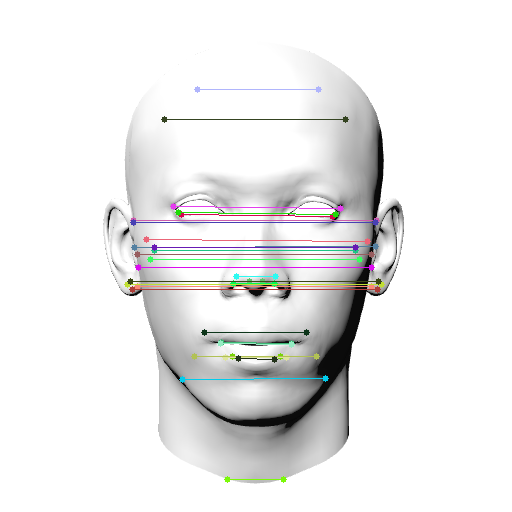

In [1]:
import cv2, json, trimesh, random, numpy as np, openmesh as om
import src.renderer as renderer
import src.camera as camera
import src.utility as util

random.seed(1000)

sym_dict = np.load("./predef/sym_dict.npy")
example_model = trimesh.load_mesh("../samples/bm_v1.6_sample.obj", 
                                  process = False)
example_model.visual.material.diffuse = np.array([255, 255, 255, 255], dtype=np.uint8)

example_model_om = om.read_trimesh("../samples/bm_v1.6_sample.obj")
verts = example_model_om.points()

# extract K Rt
K = np.array([[2000, 0, 256],
              [0, 2000, 256],
              [0, 0, 1]], dtype=np.float64)

Rt = np.array([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 1200]], dtype=np.float64)

this_cam = camera.CamPara(K = K, Rt = Rt)

# render texture image and depth
rend_depth, rend_tex = renderer.render_cvcam(example_model, K, Rt, flat_shading=True)
# render color image
_, rend_color = renderer.render_cvcam(example_model, K, Rt, flat_shading=False)

# render shade image
example_model.visual.material.image = np.ones((1, 1, 3), dtype=np.uint8)*255
_, rend_shade = renderer.render_cvcam(example_model, K, Rt, flat_shading=False)

# save all
rend_depth_vis = rend_depth.copy()
rend_depth_vis[rend_depth!=0] = rend_depth_vis[rend_depth!=0] - np.min(rend_depth[rend_depth!=0])
rend_depth_vis = (rend_depth_vis / np.max(rend_depth_vis) * 255).astype(np.uint8)

vis_img = rend_color.copy()
for i in range(30):
    idx_a = random.choice(list(range(len(verts))))
    idx_b = sym_dict[idx_a]
    
    pa = verts[idx_a]
    pb = verts[idx_b]

    xa, ya = np.round(this_cam.project(pa)).astype(np.int)
    xb, yb = np.round(this_cam.project(pb)).astype(np.int)
    
    random_color = (int((random.random()*255)), int((random.random()*255)), int((random.random()*255)))
    cv2.line(vis_img, (xa, ya), (xb, yb), random_color, 1)
    cv2.circle(vis_img, (xa, ya), 3, random_color, -1)
    cv2.circle(vis_img, (xb, yb), 3, random_color, -1)

util.show_img_arr(vis_img, bgr_mode = True)

### (2) Symmetry for Bilinear Model 1.0/1.2/1.3  and TU models
Here we replace "./predef/sym_dict.npy" with "./predef/sym_dict_old.npy", to make the code work for Bilinear Model 1.0/1.2/1.3  and TU models.  Some vertices have no symmetric couples, and they are labeled with "-1" in sym_dict_old. 

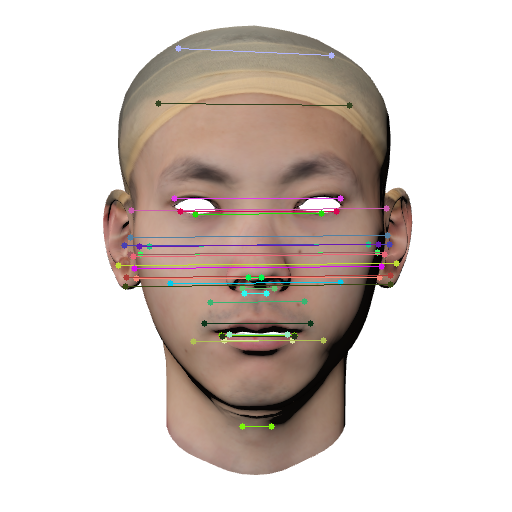

In [2]:
import cv2, json, trimesh, random, numpy as np, openmesh as om
import src.renderer as renderer
import src.camera as camera
import src.utility as util

random.seed(1000)

sym_dict = np.load("./predef/sym_dict_old.npy")
example_model = trimesh.load_mesh("../samples/sample_tu_model/1_neutral.obj", 
                                  process = False)
example_model.visual.material.diffuse = np.array([255, 255, 255, 255], dtype=np.uint8)

example_model_om = om.read_trimesh("../samples/sample_tu_model/1_neutral.obj")
verts = example_model_om.points()

# extract K Rt
K = np.array([[2000, 0, 256],
              [0, 2000, 256],
              [0, 0, 1]], dtype=np.float64)

Rt = np.array([[1, 0, 0, 0],
               [0, -1, 0, 0],
               [0, 0, -1, 1200]], dtype=np.float64)

this_cam = camera.CamPara(K = K, Rt = Rt)

# render texture image and depth
rend_depth, rend_tex = renderer.render_cvcam(example_model, K, Rt, flat_shading=True)
# render color image
_, rend_color = renderer.render_cvcam(example_model, K, Rt, flat_shading=False)

# render shade image
example_model.visual.material.image = np.ones((1, 1, 3), dtype=np.uint8)*255
_, rend_shade = renderer.render_cvcam(example_model, K, Rt, flat_shading=False)

# save all
rend_depth_vis = rend_depth.copy()
rend_depth_vis[rend_depth!=0] = rend_depth_vis[rend_depth!=0] - np.min(rend_depth[rend_depth!=0])
rend_depth_vis = (rend_depth_vis / np.max(rend_depth_vis) * 255).astype(np.uint8)

vis_img = rend_color.copy()
for i in range(30):
    idx_a = random.choice(list(range(len(verts))))
    idx_b = sym_dict[idx_a]
    if idx_b == -1:
        continue
    
    pa = verts[idx_a]
    pb = verts[idx_b]

    xa, ya = np.round(this_cam.project(pa)).astype(np.int)
    xb, yb = np.round(this_cam.project(pb)).astype(np.int)
    
    random_color = (int((random.random()*255)), int((random.random()*255)), int((random.random()*255)))
    cv2.line(vis_img, (xa, ya), (xb, yb), random_color, 1)
    cv2.circle(vis_img, (xa, ya), 3, random_color, -1)
    cv2.circle(vis_img, (xb, yb), 3, random_color, -1)

util.show_img_arr(vis_img, bgr_mode = True)